## Build and display cme open interest history from ftp.cmegroup.com daily xlsx files

(This workbook executes several Bash commands, so the workbook will not work using Windows)

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:

import pandas as pd
import pandas_datareader.data as web
import datetime as dt
import numpy as np
import os,sys
pypg_path = os.path.abspath('../../pypg')
if pypg_path not in sys.path:
    sys.path.append(pypg_path)
import pypg.pg_pandas as pg
import openpyxl as pyxl
import re
import matplotlib.pyplot as plt
import datetime
from openpyxl import load_workbook
ftp_folder = 'ftp://ftp.cmegroup.com/daily_volume'
temp_folder = './temp_folder'
local_folder = f'{temp_folder}/cme_daily_volume'
cme_csv_save_folder = './cme_oi_data'
EXAMPLE_COMMODITY_ETFS = ['GLD','SLV','USO']
REFRESH_ETF_PRICES = True

try:
    os.mkdir(cme_csv_save_folder)
except:
    pass


___
## Fetch daily_volume.xlsx files from ftp site using wget.
#### ONLY FETCH FOR A SPECIFIC YEAR
___

In [3]:
year_offset = 0
if datetime.datetime.now() < datetime.datetime(2020,1,10):
    year_offset = 1

year = str(datetime.datetime.now().year  - year_offset)
csv_fn = f'{temp_folder}/cme_open_interest_%s' %(str(year))

if not os.path.isfile(csv_fn):
    print(f"We will fetch the csv file {csv_fn}.csv")
else:
    print(f"We will NOT fetch the csv file {csv_fn}.csv")


We will fetch the csv file ./temp_folder/cme_open_interest_2019.csv


In [4]:
# !wget -P {local_folder}  {ftp_folder}/{file_name}
# year = '2019'
year = str(datetime.datetime.now().year - year_offset)

csv_fn = f'{temp_folder}/cme_open_interest_%s' %(str(year))
# fetch the data if the below is True
if not os.path.isfile(csv_fn):
    !wget -r -l1 --no-parent  -P {local_folder} -A "daily_volume_{year}*.xlsx" ftp://ftp.cmegroup.com/daily_volume/
    !mv {local_folder}/ftp.cmegroup.com/daily_volume/*.xlsx {local_folder}

--2020-01-04 20:39:57--  ftp://ftp.cmegroup.com/daily_volume/
           => './temp_folder/cme_daily_volume/ftp.cmegroup.com/daily_volume/.listing'
Resolving ftp.cmegroup.com... 52.7.201.185
Connecting to ftp.cmegroup.com|52.7.201.185|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /daily_volume ... done.
==> PASV ... done.    ==> LIST ... done.

ftp.cmegroup.com/da     [    <=>               ] 124.45K  57.2KB/s   in 2.2s   

2020-01-04 20:39:59 (57.2 KB/s) - './temp_folder/cme_daily_volume/ftp.cmegroup.com/daily_volume/.listing' saved [127434]

Removed './temp_folder/cme_daily_volume/ftp.cmegroup.com/daily_volume/.listing'.
Rejecting 'daily_volume.xlsx'.
Rejecting 'daily_volume_20140102.xlsx'.
Rejecting 'daily_volume_20140103.xlsx'.
Rejecting 'daily_volume_20140106.xlsx'.
Rejecting 'daily_volume_20140107.xlsx'.
Rejecting 'daily_volume_20140108.xlsx'.
Rejecting 'daily_volume_20140109.xlsx'.
Rejecting 'da

==> PASV ... done.    ==> RETR daily_volume_20190102.xlsx ... done.
Length: 65342 (64K)

ftp.cmegroup.com/da 100%[=====================>]  63.81K  --.-KB/s   in 0.09s  

2020-01-04 20:40:00 (704 KB/s) - './temp_folder/cme_daily_volume/ftp.cmegroup.com/daily_volume/daily_volume_20190102.xlsx' saved [65342]

--2020-01-04 20:40:00--  ftp://ftp.cmegroup.com/daily_volume/daily_volume_20190103.xlsx
           => './temp_folder/cme_daily_volume/ftp.cmegroup.com/daily_volume/daily_volume_20190103.xlsx'
==> CWD not required.
==> PASV ... done.    ==> RETR daily_volume_20190103.xlsx ... done.
Length: 67756 (66K)

ftp.cmegroup.com/da 100%[=====================>]  66.17K  --.-KB/s   in 0.09s  

2020-01-04 20:40:00 (720 KB/s) - './temp_folder/cme_daily_volume/ftp.cmegroup.com/daily_volume/daily_volume_20190103.xlsx' saved [67756]

--2020-01-04 20:40:00--  ftp://ftp.cmegroup.com/daily_volume/daily_volume_20190104.xlsx
           => './temp_folder/cme_daily_volume/ftp.cmegroup.com/daily_volume/daily_

==> PASV ... done.    ==> RETR daily_volume_20190125.xlsx ... done.
Length: 68116 (67K)

ftp.cmegroup.com/da 100%[=====================>]  66.52K   181KB/s   in 0.4s   

2020-01-04 20:40:03 (181 KB/s) - './temp_folder/cme_daily_volume/ftp.cmegroup.com/daily_volume/daily_volume_20190125.xlsx' saved [68116]

--2020-01-04 20:40:03--  ftp://ftp.cmegroup.com/daily_volume/daily_volume_20190128.xlsx
           => './temp_folder/cme_daily_volume/ftp.cmegroup.com/daily_volume/daily_volume_20190128.xlsx'
==> CWD not required.
==> PASV ... done.    ==> RETR daily_volume_20190128.xlsx ... done.
Length: 68105 (67K)

ftp.cmegroup.com/da 100%[=====================>]  66.51K  --.-KB/s   in 0.1s   

2020-01-04 20:40:03 (650 KB/s) - './temp_folder/cme_daily_volume/ftp.cmegroup.com/daily_volume/daily_volume_20190128.xlsx' saved [68105]

--2020-01-04 20:40:03--  ftp://ftp.cmegroup.com/daily_volume/daily_volume_20190129.xlsx
           => './temp_folder/cme_daily_volume/ftp.cmegroup.com/daily_volume/daily_

==> PASV ... done.    ==> RETR daily_volume_20190219.xlsx ... done.
Length: 67748 (66K)

ftp.cmegroup.com/da 100%[=====================>]  66.16K  --.-KB/s   in 0.1s   

2020-01-04 20:40:06 (576 KB/s) - './temp_folder/cme_daily_volume/ftp.cmegroup.com/daily_volume/daily_volume_20190219.xlsx' saved [67748]

--2020-01-04 20:40:06--  ftp://ftp.cmegroup.com/daily_volume/daily_volume_20190220.xlsx
           => './temp_folder/cme_daily_volume/ftp.cmegroup.com/daily_volume/daily_volume_20190220.xlsx'
==> CWD not required.
==> PASV ... done.    ==> RETR daily_volume_20190220.xlsx ... done.
Length: 68560 (67K)

ftp.cmegroup.com/da 100%[=====================>]  66.95K   398KB/s   in 0.2s   

2020-01-04 20:40:07 (398 KB/s) - './temp_folder/cme_daily_volume/ftp.cmegroup.com/daily_volume/daily_volume_20190220.xlsx' saved [68560]

--2020-01-04 20:40:07--  ftp://ftp.cmegroup.com/daily_volume/daily_volume_20190221.xlsx
           => './temp_folder/cme_daily_volume/ftp.cmegroup.com/daily_volume/daily_

==> PASV ... done.    ==> RETR daily_volume_20190313.xlsx ... done.
Length: 68312 (67K)

ftp.cmegroup.com/da 100%[=====================>]  66.71K  --.-KB/s   in 0.1s   

2020-01-04 20:40:10 (599 KB/s) - './temp_folder/cme_daily_volume/ftp.cmegroup.com/daily_volume/daily_volume_20190313.xlsx' saved [68312]

--2020-01-04 20:40:10--  ftp://ftp.cmegroup.com/daily_volume/daily_volume_20190314.xlsx
           => './temp_folder/cme_daily_volume/ftp.cmegroup.com/daily_volume/daily_volume_20190314.xlsx'
==> CWD not required.
==> PASV ... done.    ==> RETR daily_volume_20190314.xlsx ... done.
Length: 67410 (66K)

ftp.cmegroup.com/da 100%[=====================>]  65.83K   423KB/s   in 0.2s   

2020-01-04 20:40:10 (423 KB/s) - './temp_folder/cme_daily_volume/ftp.cmegroup.com/daily_volume/daily_volume_20190314.xlsx' saved [67410]

--2020-01-04 20:40:10--  ftp://ftp.cmegroup.com/daily_volume/daily_volume_20190315.xlsx
           => './temp_folder/cme_daily_volume/ftp.cmegroup.com/daily_volume/daily_

==> PASV ... done.    ==> RETR daily_volume_20190404.xlsx ... done.
Length: 66386 (65K)

ftp.cmegroup.com/da 100%[=====================>]  64.83K  --.-KB/s   in 0.09s  

2020-01-04 20:40:13 (712 KB/s) - './temp_folder/cme_daily_volume/ftp.cmegroup.com/daily_volume/daily_volume_20190404.xlsx' saved [66386]

--2020-01-04 20:40:13--  ftp://ftp.cmegroup.com/daily_volume/daily_volume_20190405.xlsx
           => './temp_folder/cme_daily_volume/ftp.cmegroup.com/daily_volume/daily_volume_20190405.xlsx'
==> CWD not required.
==> PASV ... done.    ==> RETR daily_volume_20190405.xlsx ... done.
Length: 66186 (65K)

ftp.cmegroup.com/da 100%[=====================>]  64.63K  --.-KB/s   in 0.1s   

2020-01-04 20:40:13 (644 KB/s) - './temp_folder/cme_daily_volume/ftp.cmegroup.com/daily_volume/daily_volume_20190405.xlsx' saved [66186]

--2020-01-04 20:40:13--  ftp://ftp.cmegroup.com/daily_volume/daily_volume_20190408.xlsx
           => './temp_folder/cme_daily_volume/ftp.cmegroup.com/daily_volume/daily_

==> PASV ... done.    ==> RETR daily_volume_20190429.xlsx ... done.
Length: 67617 (66K)

ftp.cmegroup.com/da 100%[=====================>]  66.03K  --.-KB/s   in 0.1s   

2020-01-04 20:40:16 (685 KB/s) - './temp_folder/cme_daily_volume/ftp.cmegroup.com/daily_volume/daily_volume_20190429.xlsx' saved [67617]

--2020-01-04 20:40:16--  ftp://ftp.cmegroup.com/daily_volume/daily_volume_20190430.xlsx
           => './temp_folder/cme_daily_volume/ftp.cmegroup.com/daily_volume/daily_volume_20190430.xlsx'
==> CWD not required.
==> PASV ... done.    ==> RETR daily_volume_20190430.xlsx ... done.
Length: 69503 (68K)

ftp.cmegroup.com/da 100%[=====================>]  67.87K  --.-KB/s   in 0.1s   

2020-01-04 20:40:16 (656 KB/s) - './temp_folder/cme_daily_volume/ftp.cmegroup.com/daily_volume/daily_volume_20190430.xlsx' saved [69503]

--2020-01-04 20:40:16--  ftp://ftp.cmegroup.com/daily_volume/daily_volume_20190501.xlsx
           => './temp_folder/cme_daily_volume/ftp.cmegroup.com/daily_volume/daily_

==> PASV ... done.    ==> RETR daily_volume_20190521.xlsx ... done.
Length: 68679 (67K)

ftp.cmegroup.com/da 100%[=====================>]  67.07K  --.-KB/s   in 0.1s   

2020-01-04 20:40:19 (592 KB/s) - './temp_folder/cme_daily_volume/ftp.cmegroup.com/daily_volume/daily_volume_20190521.xlsx' saved [68679]

--2020-01-04 20:40:19--  ftp://ftp.cmegroup.com/daily_volume/daily_volume_20190522.xlsx
           => './temp_folder/cme_daily_volume/ftp.cmegroup.com/daily_volume/daily_volume_20190522.xlsx'
==> CWD not required.
==> PASV ... done.    ==> RETR daily_volume_20190522.xlsx ... done.
Length: 68394 (67K)

ftp.cmegroup.com/da 100%[=====================>]  66.79K  --.-KB/s   in 0.09s  

2020-01-04 20:40:20 (742 KB/s) - './temp_folder/cme_daily_volume/ftp.cmegroup.com/daily_volume/daily_volume_20190522.xlsx' saved [68394]

--2020-01-04 20:40:20--  ftp://ftp.cmegroup.com/daily_volume/daily_volume_20190523.xlsx
           => './temp_folder/cme_daily_volume/ftp.cmegroup.com/daily_volume/daily_

==> PASV ... done.    ==> RETR daily_volume_20190613.xlsx ... done.
Length: 68967 (67K)

ftp.cmegroup.com/da 100%[=====================>]  67.35K  --.-KB/s   in 0.1s   

2020-01-04 20:40:23 (456 KB/s) - './temp_folder/cme_daily_volume/ftp.cmegroup.com/daily_volume/daily_volume_20190613.xlsx' saved [68967]

--2020-01-04 20:40:23--  ftp://ftp.cmegroup.com/daily_volume/daily_volume_20190614.xlsx
           => './temp_folder/cme_daily_volume/ftp.cmegroup.com/daily_volume/daily_volume_20190614.xlsx'
==> CWD not required.
==> PASV ... done.    ==> RETR daily_volume_20190614.xlsx ... done.
Length: 67121 (66K)

ftp.cmegroup.com/da 100%[=====================>]  65.55K  --.-KB/s   in 0.09s  

2020-01-04 20:40:23 (696 KB/s) - './temp_folder/cme_daily_volume/ftp.cmegroup.com/daily_volume/daily_volume_20190614.xlsx' saved [67121]

--2020-01-04 20:40:23--  ftp://ftp.cmegroup.com/daily_volume/daily_volume_20190617.xlsx
           => './temp_folder/cme_daily_volume/ftp.cmegroup.com/daily_volume/daily_

==> PASV ... done.    ==> RETR daily_volume_20190708.xlsx ... done.
Length: 66873 (65K)

ftp.cmegroup.com/da 100%[=====================>]  65.31K  --.-KB/s   in 0.1s   

2020-01-04 20:40:26 (658 KB/s) - './temp_folder/cme_daily_volume/ftp.cmegroup.com/daily_volume/daily_volume_20190708.xlsx' saved [66873]

--2020-01-04 20:40:26--  ftp://ftp.cmegroup.com/daily_volume/daily_volume_20190709.xlsx
           => './temp_folder/cme_daily_volume/ftp.cmegroup.com/daily_volume/daily_volume_20190709.xlsx'
==> CWD not required.
==> PASV ... done.    ==> RETR daily_volume_20190709.xlsx ... done.
Length: 67881 (66K)

ftp.cmegroup.com/da 100%[=====================>]  66.29K  --.-KB/s   in 0.1s   

2020-01-04 20:40:26 (582 KB/s) - './temp_folder/cme_daily_volume/ftp.cmegroup.com/daily_volume/daily_volume_20190709.xlsx' saved [67881]

--2020-01-04 20:40:26--  ftp://ftp.cmegroup.com/daily_volume/daily_volume_20190710.xlsx
           => './temp_folder/cme_daily_volume/ftp.cmegroup.com/daily_volume/daily_

==> PASV ... done.    ==> RETR daily_volume_20190730.xlsx ... done.
Length: 70427 (69K)

ftp.cmegroup.com/da 100%[=====================>]  68.78K  --.-KB/s   in 0.08s  

2020-01-04 20:40:29 (813 KB/s) - './temp_folder/cme_daily_volume/ftp.cmegroup.com/daily_volume/daily_volume_20190730.xlsx' saved [70427]

--2020-01-04 20:40:29--  ftp://ftp.cmegroup.com/daily_volume/daily_volume_20190731.xlsx
           => './temp_folder/cme_daily_volume/ftp.cmegroup.com/daily_volume/daily_volume_20190731.xlsx'
==> CWD not required.
==> PASV ... done.    ==> RETR daily_volume_20190731.xlsx ... done.
Length: 71004 (69K)

ftp.cmegroup.com/da 100%[=====================>]  69.34K  --.-KB/s   in 0.09s  

2020-01-04 20:40:29 (772 KB/s) - './temp_folder/cme_daily_volume/ftp.cmegroup.com/daily_volume/daily_volume_20190731.xlsx' saved [71004]

--2020-01-04 20:40:29--  ftp://ftp.cmegroup.com/daily_volume/daily_volume_20190801.xlsx
           => './temp_folder/cme_daily_volume/ftp.cmegroup.com/daily_volume/daily_

==> PASV ... done.    ==> RETR daily_volume_20190821.xlsx ... done.
Length: 69680 (68K)

ftp.cmegroup.com/da 100%[=====================>]  68.05K  --.-KB/s   in 0.09s  

2020-01-04 20:40:32 (793 KB/s) - './temp_folder/cme_daily_volume/ftp.cmegroup.com/daily_volume/daily_volume_20190821.xlsx' saved [69680]

--2020-01-04 20:40:32--  ftp://ftp.cmegroup.com/daily_volume/daily_volume_20190822.xlsx
           => './temp_folder/cme_daily_volume/ftp.cmegroup.com/daily_volume/daily_volume_20190822.xlsx'
==> CWD not required.
==> PASV ... done.    ==> RETR daily_volume_20190822.xlsx ... done.
Length: 69266 (68K)

ftp.cmegroup.com/da 100%[=====================>]  67.64K  --.-KB/s   in 0.1s   

2020-01-04 20:40:32 (688 KB/s) - './temp_folder/cme_daily_volume/ftp.cmegroup.com/daily_volume/daily_volume_20190822.xlsx' saved [69266]

--2020-01-04 20:40:32--  ftp://ftp.cmegroup.com/daily_volume/daily_volume_20190823.xlsx
           => './temp_folder/cme_daily_volume/ftp.cmegroup.com/daily_volume/daily_

==> PASV ... done.    ==> RETR daily_volume_20190913.xlsx ... done.
Length: 68074 (66K)

ftp.cmegroup.com/da 100%[=====================>]  66.48K  --.-KB/s   in 0.1s   

2020-01-04 20:40:35 (670 KB/s) - './temp_folder/cme_daily_volume/ftp.cmegroup.com/daily_volume/daily_volume_20190913.xlsx' saved [68074]

--2020-01-04 20:40:35--  ftp://ftp.cmegroup.com/daily_volume/daily_volume_20190916.xlsx
           => './temp_folder/cme_daily_volume/ftp.cmegroup.com/daily_volume/daily_volume_20190916.xlsx'
==> CWD not required.
==> PASV ... done.    ==> RETR daily_volume_20190916.xlsx ... done.
Length: 67507 (66K)

ftp.cmegroup.com/da 100%[=====================>]  65.92K  --.-KB/s   in 0.09s  

2020-01-04 20:40:35 (716 KB/s) - './temp_folder/cme_daily_volume/ftp.cmegroup.com/daily_volume/daily_volume_20190916.xlsx' saved [67507]

--2020-01-04 20:40:35--  ftp://ftp.cmegroup.com/daily_volume/daily_volume_20190917.xlsx
           => './temp_folder/cme_daily_volume/ftp.cmegroup.com/daily_volume/daily_

==> PASV ... done.    ==> RETR daily_volume_20191007.xlsx ... done.
Length: 65677 (64K)

ftp.cmegroup.com/da 100%[=====================>]  64.14K  --.-KB/s   in 0.09s  

2020-01-04 20:40:38 (726 KB/s) - './temp_folder/cme_daily_volume/ftp.cmegroup.com/daily_volume/daily_volume_20191007.xlsx' saved [65677]

--2020-01-04 20:40:38--  ftp://ftp.cmegroup.com/daily_volume/daily_volume_20191008.xlsx
           => './temp_folder/cme_daily_volume/ftp.cmegroup.com/daily_volume/daily_volume_20191008.xlsx'
==> CWD not required.
==> PASV ... done.    ==> RETR daily_volume_20191008.xlsx ... done.
Length: 66256 (65K)

ftp.cmegroup.com/da 100%[=====================>]  64.70K  --.-KB/s   in 0.1s   

2020-01-04 20:40:38 (655 KB/s) - './temp_folder/cme_daily_volume/ftp.cmegroup.com/daily_volume/daily_volume_20191008.xlsx' saved [66256]

--2020-01-04 20:40:38--  ftp://ftp.cmegroup.com/daily_volume/daily_volume_20191009.xlsx
           => './temp_folder/cme_daily_volume/ftp.cmegroup.com/daily_volume/daily_

==> PASV ... done.    ==> RETR daily_volume_20191029.xlsx ... done.
Length: 68271 (67K)

ftp.cmegroup.com/da 100%[=====================>]  66.67K  --.-KB/s   in 0.09s  

2020-01-04 20:40:41 (705 KB/s) - './temp_folder/cme_daily_volume/ftp.cmegroup.com/daily_volume/daily_volume_20191029.xlsx' saved [68271]

--2020-01-04 20:40:41--  ftp://ftp.cmegroup.com/daily_volume/daily_volume_20191030.xlsx
           => './temp_folder/cme_daily_volume/ftp.cmegroup.com/daily_volume/daily_volume_20191030.xlsx'
==> CWD not required.
==> PASV ... done.    ==> RETR daily_volume_20191030.xlsx ... done.
Length: 68758 (67K)

ftp.cmegroup.com/da 100%[=====================>]  67.15K  --.-KB/s   in 0.1s   

2020-01-04 20:40:42 (581 KB/s) - './temp_folder/cme_daily_volume/ftp.cmegroup.com/daily_volume/daily_volume_20191030.xlsx' saved [68758]

--2020-01-04 20:40:42--  ftp://ftp.cmegroup.com/daily_volume/daily_volume_20191031.xlsx
           => './temp_folder/cme_daily_volume/ftp.cmegroup.com/daily_volume/daily_

==> PASV ... done.    ==> RETR daily_volume_20191120.xlsx ... done.
Length: 67594 (66K)

ftp.cmegroup.com/da 100%[=====================>]  66.01K  --.-KB/s   in 0.09s  

2020-01-04 20:40:44 (727 KB/s) - './temp_folder/cme_daily_volume/ftp.cmegroup.com/daily_volume/daily_volume_20191120.xlsx' saved [67594]

--2020-01-04 20:40:44--  ftp://ftp.cmegroup.com/daily_volume/daily_volume_20191121.xlsx
           => './temp_folder/cme_daily_volume/ftp.cmegroup.com/daily_volume/daily_volume_20191121.xlsx'
==> CWD not required.
==> PASV ... done.    ==> RETR daily_volume_20191121.xlsx ... done.
Length: 67293 (66K)

ftp.cmegroup.com/da 100%[=====================>]  65.72K  --.-KB/s   in 0.09s  

2020-01-04 20:40:45 (700 KB/s) - './temp_folder/cme_daily_volume/ftp.cmegroup.com/daily_volume/daily_volume_20191121.xlsx' saved [67293]

--2020-01-04 20:40:45--  ftp://ftp.cmegroup.com/daily_volume/daily_volume_20191122.xlsx
           => './temp_folder/cme_daily_volume/ftp.cmegroup.com/daily_volume/daily_

==> PASV ... done.    ==> RETR daily_volume_20191213.xlsx ... done.
Length: 65041 (64K)

ftp.cmegroup.com/da 100%[=====================>]  63.52K  --.-KB/s   in 0.1s   

2020-01-04 20:40:48 (585 KB/s) - './temp_folder/cme_daily_volume/ftp.cmegroup.com/daily_volume/daily_volume_20191213.xlsx' saved [65041]

--2020-01-04 20:40:48--  ftp://ftp.cmegroup.com/daily_volume/daily_volume_20191216.xlsx
           => './temp_folder/cme_daily_volume/ftp.cmegroup.com/daily_volume/daily_volume_20191216.xlsx'
==> CWD not required.
==> PASV ... done.    ==> RETR daily_volume_20191216.xlsx ... done.
Length: 66133 (65K)

ftp.cmegroup.com/da 100%[=====================>]  64.58K  --.-KB/s   in 0.1s   

2020-01-04 20:40:48 (622 KB/s) - './temp_folder/cme_daily_volume/ftp.cmegroup.com/daily_volume/daily_volume_20191216.xlsx' saved [66133]

--2020-01-04 20:40:48--  ftp://ftp.cmegroup.com/daily_volume/daily_volume_20191217.xlsx
           => './temp_folder/cme_daily_volume/ftp.cmegroup.com/daily_volume/daily_

___
### Extract the open interest data from the xlsx workbook, and save it in csv files named "cme_open_interest_yyyy.csv" where yyyy is like 2019.

* This takes a long time, so don't rerun it if you have already created a DataFrame for the year
___

In [5]:
if not os.path.isfile(csv_fn):

    # get all of the xlsx files
    file_names = os.listdir(local_folder)

    # Create a place holder for the final DataFrame
    df_all_col_data = None

    # valid files have 'daily_volume' in the name, 
    for fn in file_names:
        if 'daily_volume' not in fn:
            continue
        # and valid files have the year that we are currently working on in the name as well
        if year not in fn:
            continue

        # If you get here, you will process the xlsx or xls file
        full_path = f'{local_folder}/{fn}'
        if len(re.findall('.xls$',full_path)) > 0:
            # if the file is an xls file, convert it to xlsx using libreoffice
            !/Applications/LibreOffice.app/Contents/MacOS/soffice --convert-to xlsx {full_path} --headless --outdir {local_folder} 
            full_path = full_path + "x"

        print(f'processing {full_path} ')

        # Get a workbook
        wb = load_workbook(filename = full_path)
        # Get a worksheet
        sheet_ranges = wb['CME Group Vol and OI by Product']
        # find Header column by finding Description
        first_row = None
        for i in range(1,20):
            cell_val = sheet_ranges[f'A{str(i)}'].value
            if 'description' in str(cell_val).lower():
                first_row = str(i)
                break
        if first_row is None:
            print('ERROR: cannot find header column')
            break

        # Get the column names, and get rid of non-alphabetic characters
        data = sheet_ranges[f'A{first_row}:L1000']
        cols = ['_'.join(re.findall('[A-Za-z ]{1,}',str(data[0][i].value))) for i in range(12)]
        cols = [c.strip().replace(' ','_').replace('__','_') for c in cols]

        # Populate col_data, which has all of the data for each column
        col_data = []
        for j in range(12):
            this_col = []
            for i in range(1,len(data)):
                try:
                    this_col.append(data[i][j].value)
                except:
                    this_col.append(None)
            col_data.append(this_col)

        # Create the dictionary of column names and data for creating the DataFrame
        dict_for_df = {cols[i]:col_data[i] for i in range(12)}

        # Create the DataFrame
        df_col_data = pd.DataFrame(dict_for_df) 

        # Add a trade_date field
        df_col_data['trade_date'] = int(re.findall('20[0-9]{2}[0-1][0-9][0-3][0-9]',fn)[0])

        # populate df_all_col_data, which is the dataframe that holds all of the open interest data for each day
        if df_all_col_data is None:
            df_all_col_data = df_col_data.copy()
        else:
            df_all_col_data = df_all_col_data.append(df_col_data)
            
    # Save df_all_col_data and save a version just for CL
    df_all_col_data.to_csv(f'{cme_csv_save_folder}/cme_open_interest_{year}.csv',index=False)
#     df_all_col_data[df_all_col_data.Commodity_Indicator=='CL'].to_csv(f'{temp_folder}/cl_open_interest_{year}.csv',index=False)
            

processing ./temp_folder/cme_daily_volume/daily_volume_20190102.xlsx 
processing ./temp_folder/cme_daily_volume/daily_volume_20190103.xlsx 
processing ./temp_folder/cme_daily_volume/daily_volume_20190104.xlsx 
processing ./temp_folder/cme_daily_volume/daily_volume_20190107.xlsx 
processing ./temp_folder/cme_daily_volume/daily_volume_20190108.xlsx 
processing ./temp_folder/cme_daily_volume/daily_volume_20190109.xlsx 
processing ./temp_folder/cme_daily_volume/daily_volume_20190110.xlsx 
processing ./temp_folder/cme_daily_volume/daily_volume_20190111.xlsx 
processing ./temp_folder/cme_daily_volume/daily_volume_20190114.xlsx 
processing ./temp_folder/cme_daily_volume/daily_volume_20190115.xlsx 
processing ./temp_folder/cme_daily_volume/daily_volume_20190116.xlsx 
processing ./temp_folder/cme_daily_volume/daily_volume_20190117.xlsx 
processing ./temp_folder/cme_daily_volume/daily_volume_20190118.xlsx 
processing ./temp_folder/cme_daily_volume/daily_volume_20190122.xlsx 
processing ./temp_fo

processing ./temp_folder/cme_daily_volume/daily_volume_20190621.xlsx 
processing ./temp_folder/cme_daily_volume/daily_volume_20190624.xlsx 
processing ./temp_folder/cme_daily_volume/daily_volume_20190625.xlsx 
processing ./temp_folder/cme_daily_volume/daily_volume_20190626.xlsx 
processing ./temp_folder/cme_daily_volume/daily_volume_20190627.xlsx 
processing ./temp_folder/cme_daily_volume/daily_volume_20190628.xlsx 
processing ./temp_folder/cme_daily_volume/daily_volume_20190701.xlsx 
processing ./temp_folder/cme_daily_volume/daily_volume_20190702.xlsx 
processing ./temp_folder/cme_daily_volume/daily_volume_20190703.xlsx 
processing ./temp_folder/cme_daily_volume/daily_volume_20190705.xlsx 
processing ./temp_folder/cme_daily_volume/daily_volume_20190708.xlsx 
processing ./temp_folder/cme_daily_volume/daily_volume_20190709.xlsx 
processing ./temp_folder/cme_daily_volume/daily_volume_20190710.xlsx 
processing ./temp_folder/cme_daily_volume/daily_volume_20190711.xlsx 
processing ./temp_fo

processing ./temp_folder/cme_daily_volume/daily_volume_20191209.xlsx 
processing ./temp_folder/cme_daily_volume/daily_volume_20191210.xlsx 
processing ./temp_folder/cme_daily_volume/daily_volume_20191211.xlsx 
processing ./temp_folder/cme_daily_volume/daily_volume_20191212.xlsx 
processing ./temp_folder/cme_daily_volume/daily_volume_20191213.xlsx 
processing ./temp_folder/cme_daily_volume/daily_volume_20191216.xlsx 
processing ./temp_folder/cme_daily_volume/daily_volume_20191217.xlsx 
processing ./temp_folder/cme_daily_volume/daily_volume_20191218.xlsx 
processing ./temp_folder/cme_daily_volume/daily_volume_20191219.xlsx 
processing ./temp_folder/cme_daily_volume/daily_volume_20191220.xlsx 
processing ./temp_folder/cme_daily_volume/daily_volume_20191223.xlsx 
processing ./temp_folder/cme_daily_volume/daily_volume_20191224.xlsx 
processing ./temp_folder/cme_daily_volume/daily_volume_20191226.xlsx 
processing ./temp_folder/cme_daily_volume/daily_volume_20191227.xlsx 
processing ./temp_fo

___
### Create the df_commodity_all_years DataFrame 
#### This DataFrame has Commodity open interest data for multiple years, for a specific commodity.
___

In [6]:
commodity = 'GC'
csv_name_template = f'{cme_csv_save_folder}/cme_open_interest_%s.csv'
df_commodity_all_years = None
years = [2013,2014,2015,2016,2017,2018,2019]
for y in years:
    n = csv_name_template %(str(y))
    df_temp = pd.read_csv(n)
    df_temp = df_temp[df_temp.Commodity_Indicator==commodity]
    if df_commodity_all_years is None:
        df_commodity_all_years = df_temp.copy()
    else:
        df_commodity_all_years = df_commodity_all_years.append(df_temp)

# make sure it's sorted
df_commodity_all_years_sorted = df_commodity_all_years.sort_values(by='trade_date')
df_commodity_all_years_sorted.index = range(len(df_commodity_all_years_sorted))

___
### Create a method that Plots Commodity open interest, and selected ETF
___

In [7]:
def plot_open_interest(df_in,num_of_x_ticks=20):
    df_cl = df_in[['trade_date','Open_Interest','etf']]
    df_cl = df_cl[~df_cl.Open_Interest.isnull()]
    df_cl.Open_Interest = df_cl.Open_Interest.astype(float).astype(int)
    
    df_cl = df_cl.drop_duplicates()
    xs = list(df_cl.trade_date)
    df_cl['trade_date'] = df_cl.trade_date.apply(lambda i:str(i))

    x = list(range(len(df_cl)))
    n = len(x)
    s = num_of_x_ticks
    k = n//s*s
    x_indices = x[::-1][:k][::k//s][::-1]
    x_labels = [str(t) for t in list(df_cl.iloc[x_indices].trade_date)]
    y = list(df_cl.Open_Interest)[x_indices[0]:]
    y2 = list(df_cl['etf'])[x_indices[0]:]
    x = x[x_indices[0]:]
    fig, ax = plt.subplots(1,1,figsize=(10,8))
    ax.grid(color='lightgray', alpha=0.7)

    ax.plot(x,y,'b-')
    ax.set_ylabel("Open Interest")
    ax.tick_params('y', colors='b')
    plt.xticks(x_indices, x_labels, rotation='vertical')
    plt.subplots_adjust(bottom=0.20)
    plt.xticks(rotation=60)

    ax2 = ax.twinx()
    ax2.plot(x,y2,'r-',)
    ax2.set_title("ETF NAV vs Open Interest")
    ax2.set_ylabel("ETF NAV")    
    ax2.tick_params('y', colors='r')

    plt.show()


In [8]:
if REFRESH_ETF_PRICES:
    for commod in EXAMPLE_COMMODITY_ETFS:
        dfe = web.DataReader(commod, 'yahoo', dt.datetime(2016, 1, 1), dt.datetime.now())
        dfe['Date'] = dfe.index
        dfe.index  = list(range(len(dfe)))
        dfe['trade_date'] = dfe.Date.apply(lambda s:int(str(s)[0:4]+str(s)[5:7]+str(s)[8:10]))
        dfe = dfe[['Date','Open','High','Low','Close','Adj Close','Volume','trade_date']]
        dfe.to_csv(f'{commod}_daily.csv',index=False)

### Execute the plot

In [9]:
etf_path = 'gld_daily.csv'
df_etf_daily = pd.read_csv(etf_path)
df_etf_daily = df_etf_daily.drop_duplicates()
df_etf_daily['trade_date'] = df_etf_daily.Date.apply(lambda s: int(s[0:4]+s[5:7]+s[8:10]))
df_etf_daily2 = df_etf_daily.sort_values(by='trade_date')
df_etf_daily3 = df_etf_daily2[['trade_date','Adj Close']].rename(columns={'Adj Close':'etf'})
df_commodity_all_years_with_etf = df_commodity_all_years_sorted.merge(df_etf_daily3,how='inner',on='trade_date')
df_commodity_all_years_with_etf.trade_date = df_commodity_all_years_with_etf.trade_date.astype(int)
df_commodity_all_years_with_etf = df_commodity_all_years_with_etf.drop_duplicates()

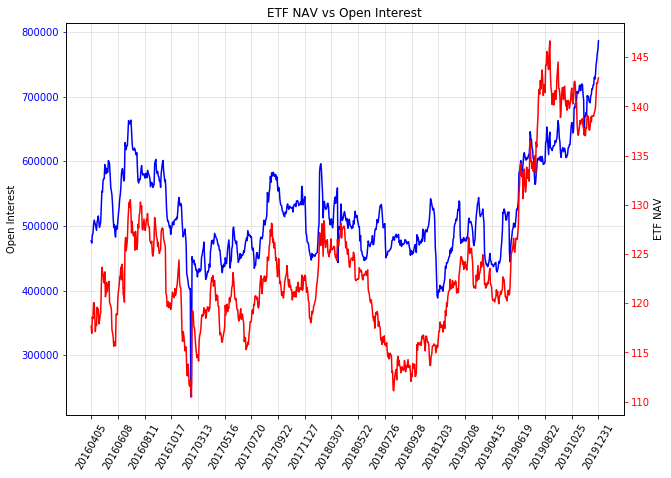

In [10]:
plot_open_interest(df_commodity_all_years_with_etf)

### Execute a zoomed in version

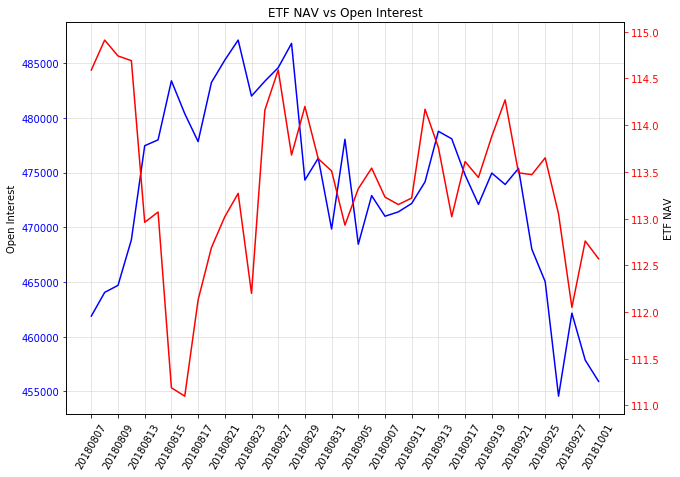

In [11]:
beg_yyyymmdd = 20180801
end_yyyymmdd = 20181001
c1= df_commodity_all_years_with_etf.trade_date>=beg_yyyymmdd
c2 = df_commodity_all_years_with_etf.trade_date<=end_yyyymmdd
c_all = (c1 & c2)
df_sub = df_commodity_all_years_with_etf[c_all][[
    'trade_date','Open_Interest','etf']].drop_duplicates()
plot_open_interest(df_sub)

## End